# Question 1 (20 pts) - COMPLETE
Design and implement an approach using power method to determine the first dimension of the PCA
transformation.

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp

# import data (test irirs)
iris = datasets.load_iris()
X = iris.data
y= iris.target

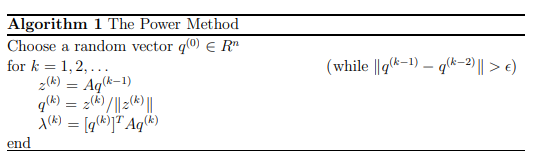

In [2]:
# getting eig_val of a PC
def power_method(A, k):
  Ashape = A.shape[0]
  q = np.random.rand(Ashape)
  
  for i in range(k):
    z = A.dot(q) # dot product A q
    z_norm = np.linalg.norm(z) # normalize
    q = z / np.abs(z_norm) # normalize z^k / ||z^k||
    lambda_ev = np.dot(np.transpose(q), A.dot(q)) 
		
  return lambda_ev

In [3]:
X_good = StandardScaler().fit_transform(X) # centering points around 0
features = X_good.T
cov_matrix  = np.cov(features) # good data

PC1_val = power_method(cov_matrix[0], 10000)
PC2_val = power_method(cov_matrix[1], 10000)

In [4]:
eig_val , eig_vec = np.linalg.eig(cov_matrix)
eigenValue_PC1 = []
eigenValue_PC2 = []
# should both converge to one 
for i in range(len(PC1_val)):
    eigenValue_PC1.append(PC1_val[i] / np.sum(PC1_val))
 
print(np.sum(eigenValue_PC1), '\n', eigenValue_PC1)

for i in range(len(PC2_val)):
    eigenValue_PC2.append(PC2_val[i] / np.sum(PC2_val))
 
print(np.sum(eigenValue_PC2), '\n', eigenValue_PC2)

1.0 
 [0.38878357549254305, -0.04570920104511501, 0.338923549938311, 0.3180020756142611]
1.0 
 [-1.3380855027733072, 11.381202344129354, -4.8761635197257736, -4.166953321630274]


In [5]:
pc1 = X_good.dot(PC1_val.T)
pc2 = X_good.dot(PC2_val.T)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


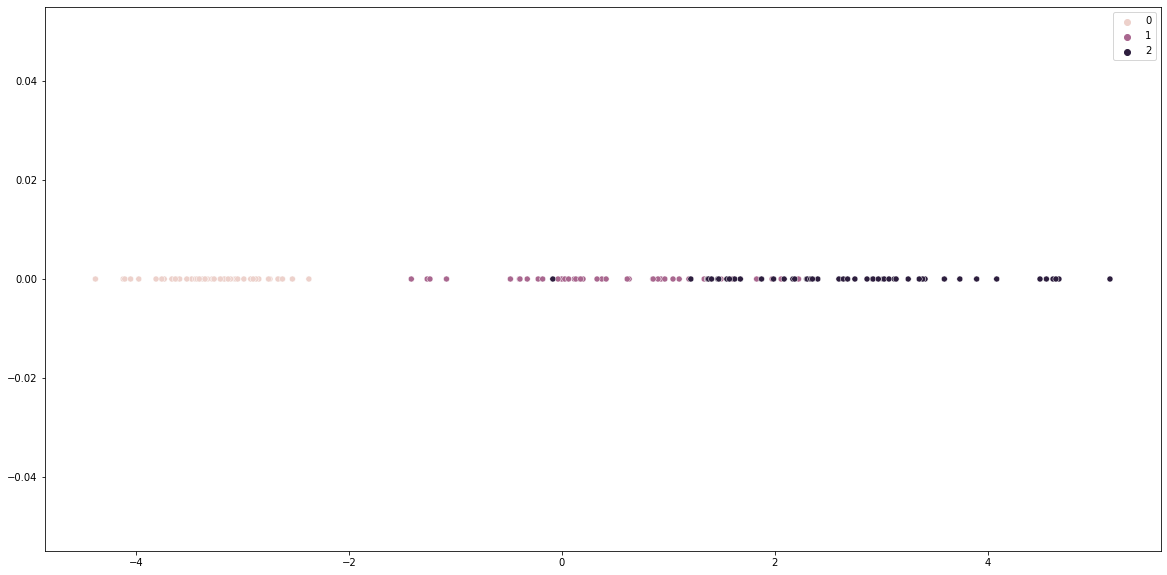

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.scatterplot(pc1, [0] * 150, hue=y)

# Question 2 (20 pts)-- COMPLETE
Design and implement an approach using power method to determine the second dimension of the PCA transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


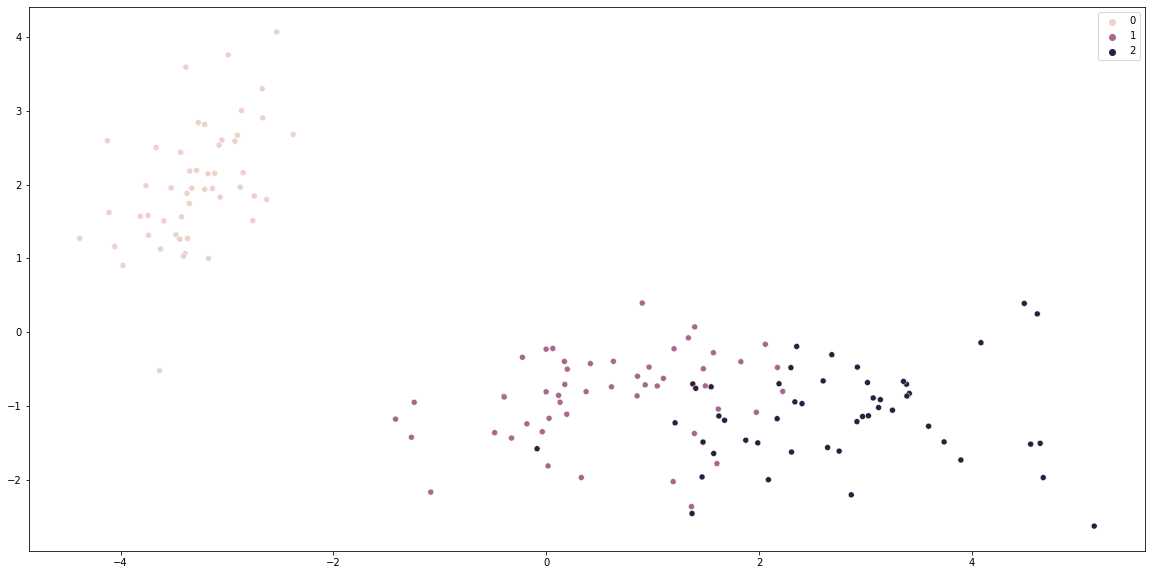

In [7]:
plt.figure(figsize=(20, 10))
sns.scatterplot(pc1, pc2, hue=y)